# Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qspectro2d.utils import phase_cycle_component

In [2]:
# Setup phases and times
times = np.linspace(0, 10, 100)

# Test with Function that doesnt not depend on phases

Phases from, to, length 0.0 4.71238898038469 4 [0.  0.5 1.  1.5]


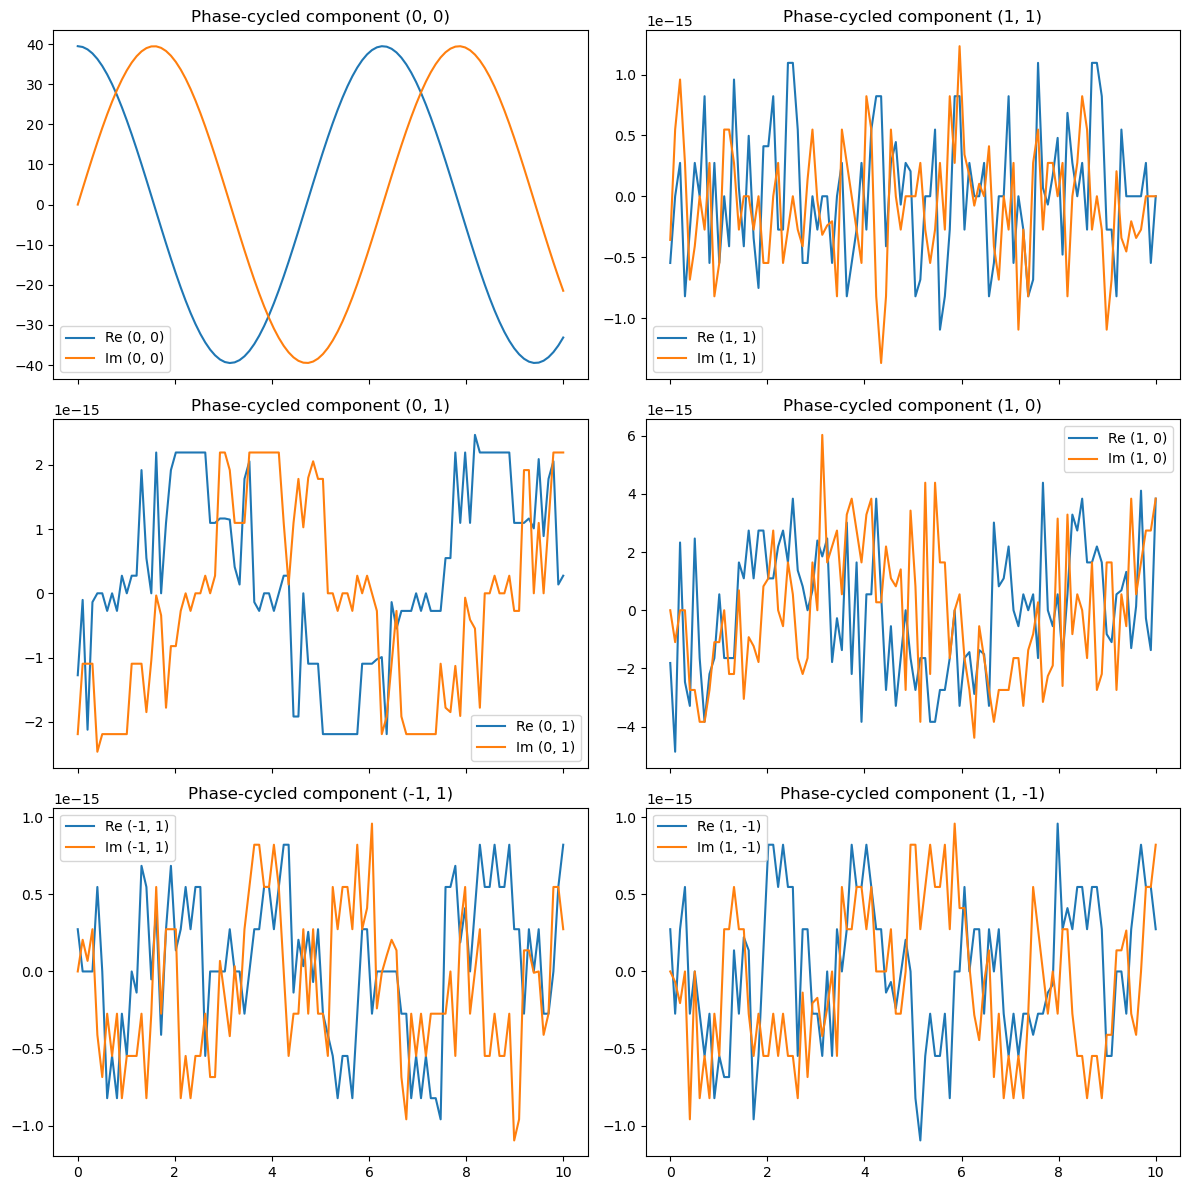

In [3]:
N_PHASES = 4  # Number of phase cycles for the simulation
DPHI = 2 * np.pi / N_PHASES
phases = DPHI * np.arange(N_PHASES)


# Test with function depending only on t
w = 1.0
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for t_idx, t in enumerate(times):
    P_grid[:, :, t_idx] = np.exp(1j * w * t)

print("Phases from, to, length", phases[0], phases[-1], len(phases), phases / np.pi)
lm_list = [(0,0), (1,1), (0,1), (1,0), (-1,1), (1,-1)]
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with Linear in phi1

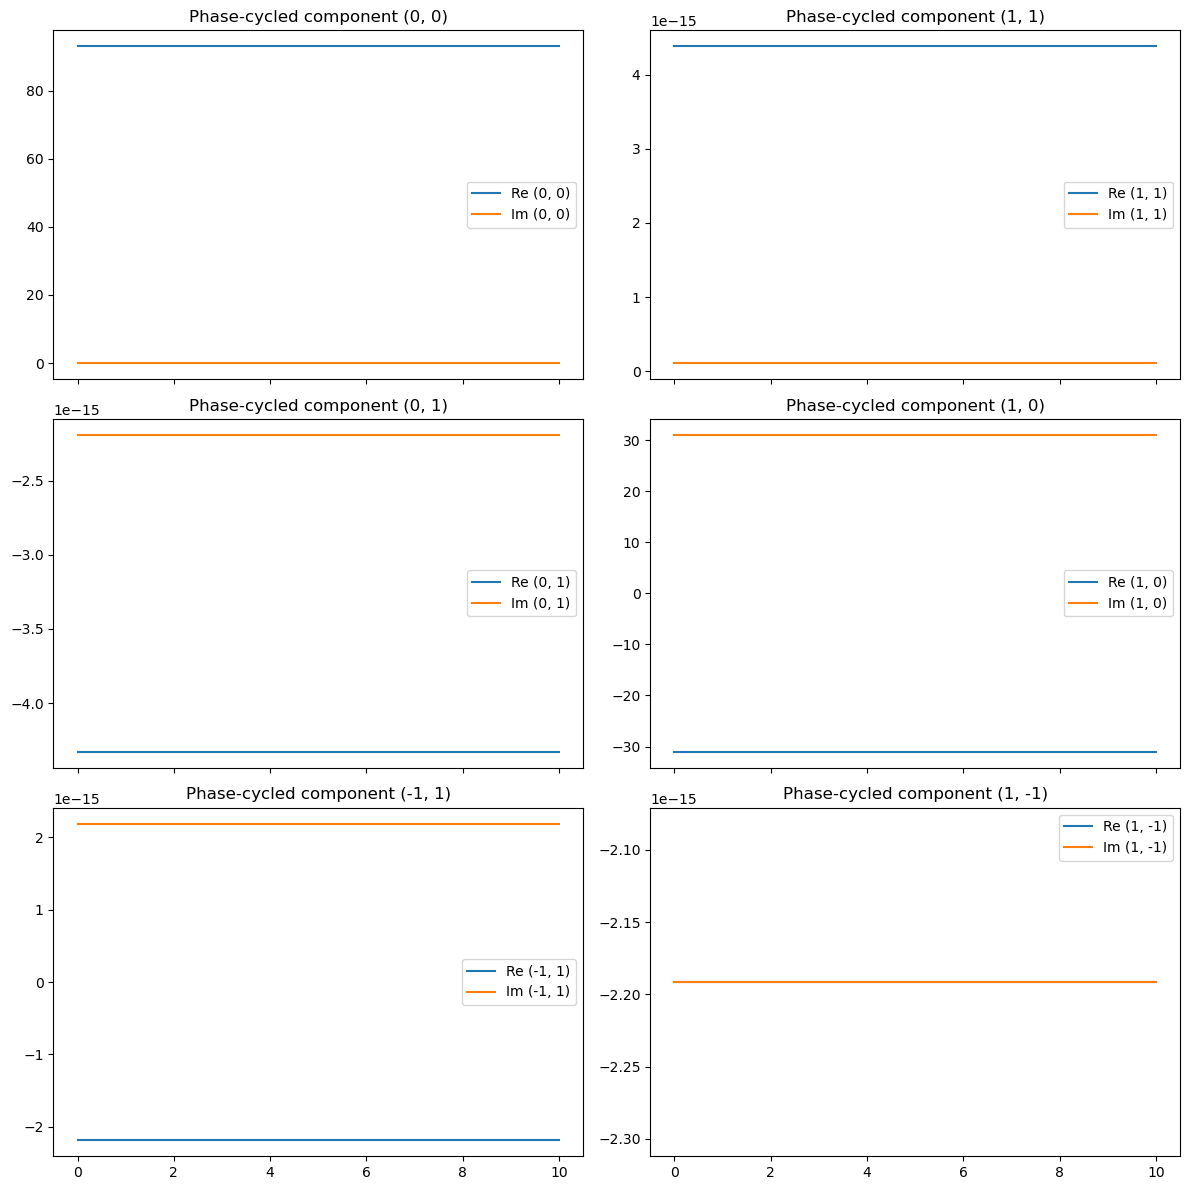

In [4]:
# Test with Linear in phi1
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = phi1

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with Product phi1 * phi2

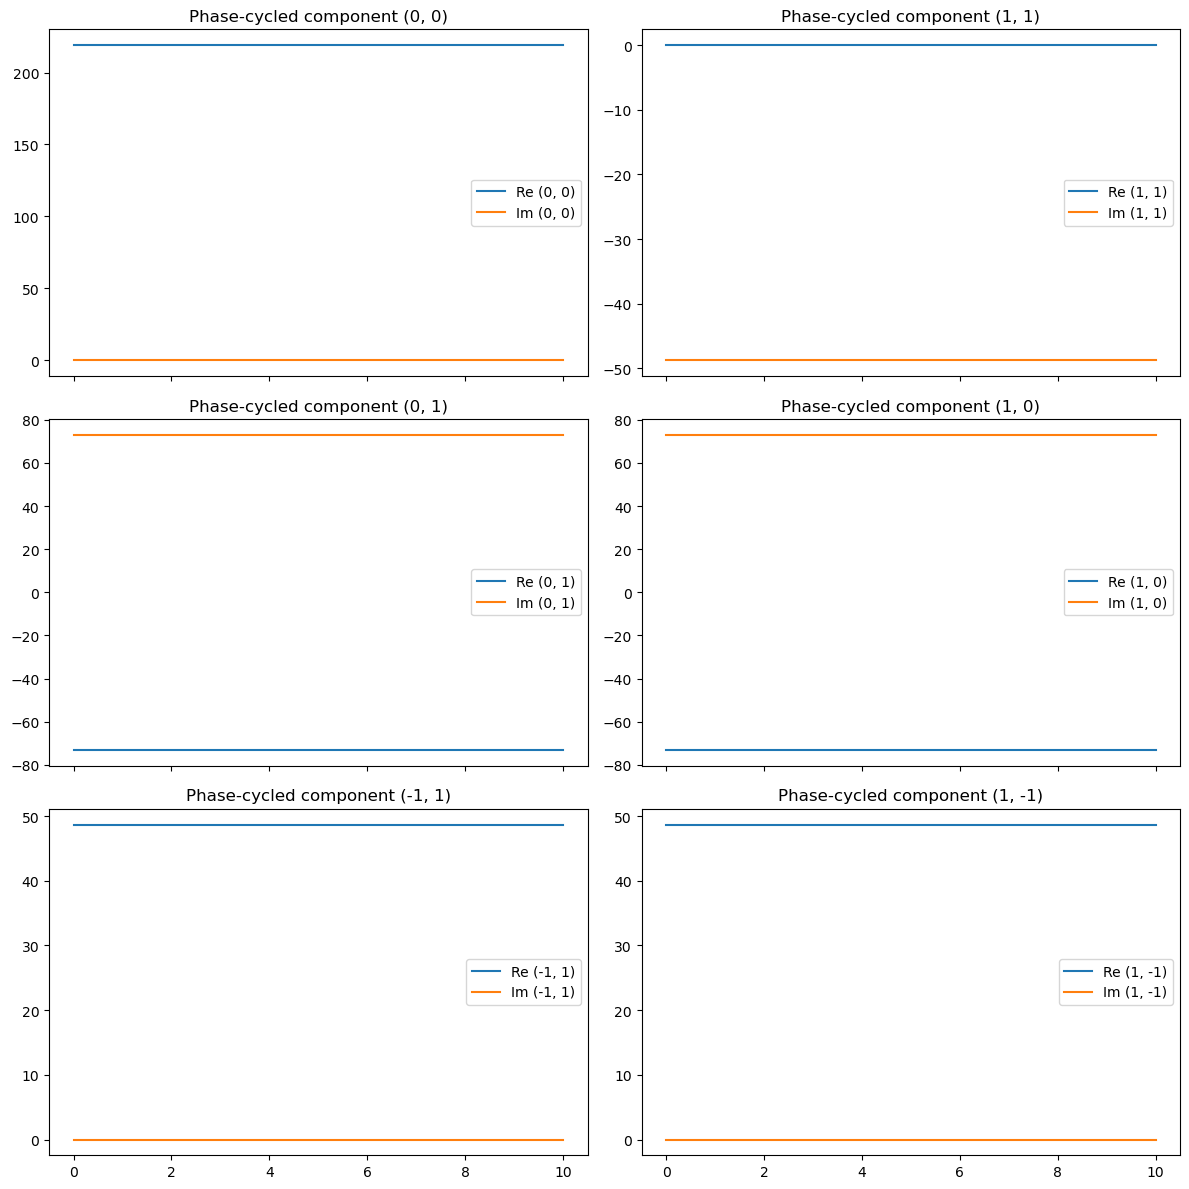

In [5]:
# Test with Product phi1 * phi2
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = phi1 * phi2

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with cos(phi1 - w t)

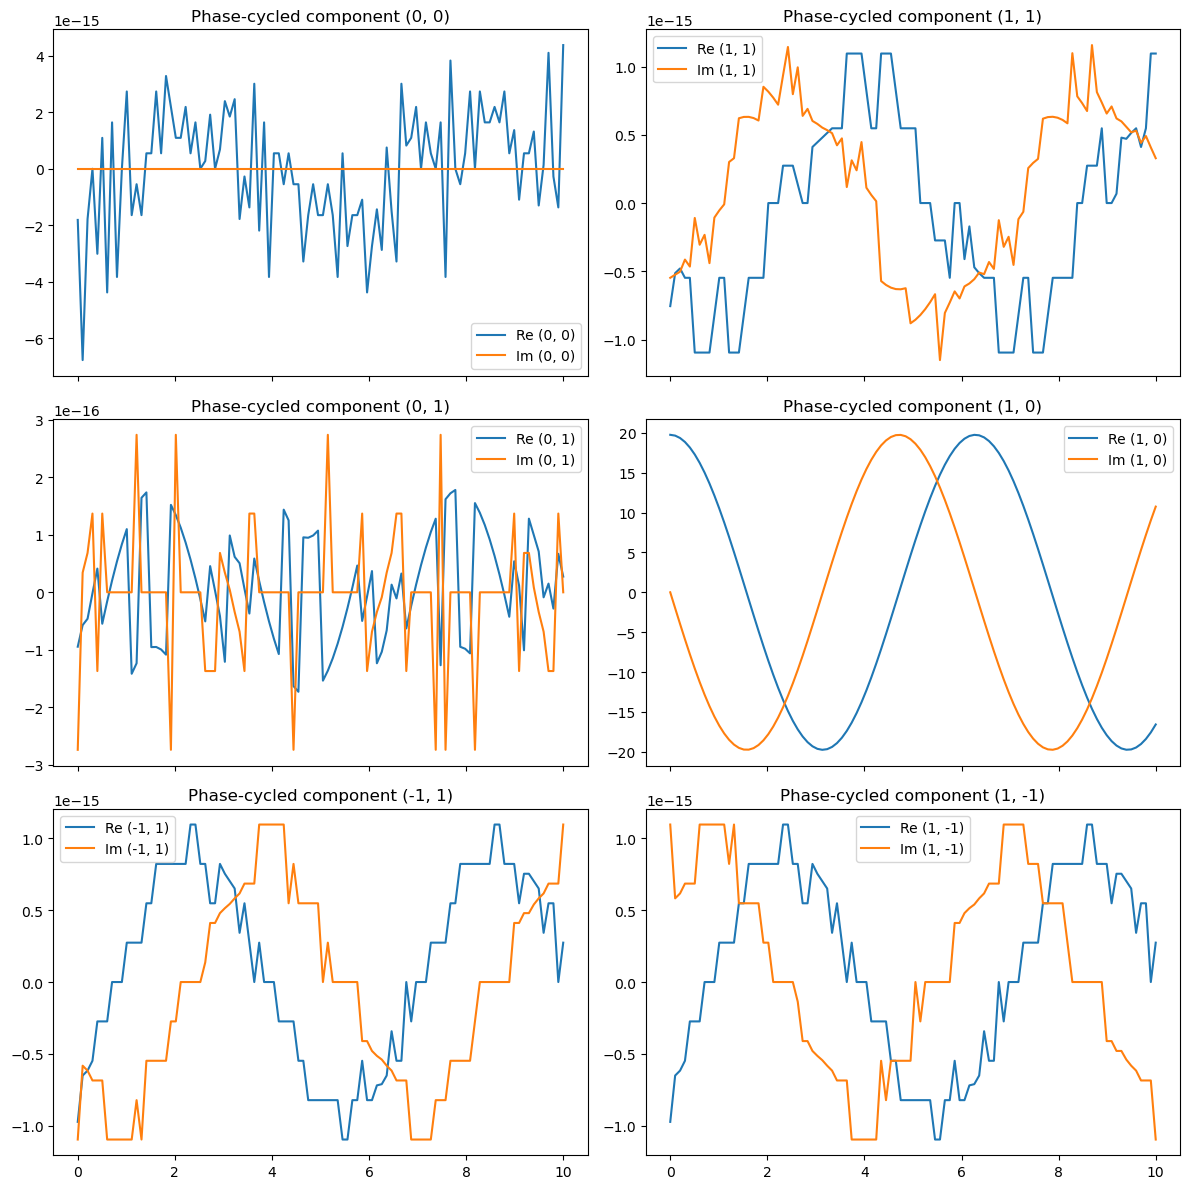

In [6]:
# Test with cos(phi1 - w t)
w = 1.0
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.cos(phi1 - w * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with exp(phi1 - w t)

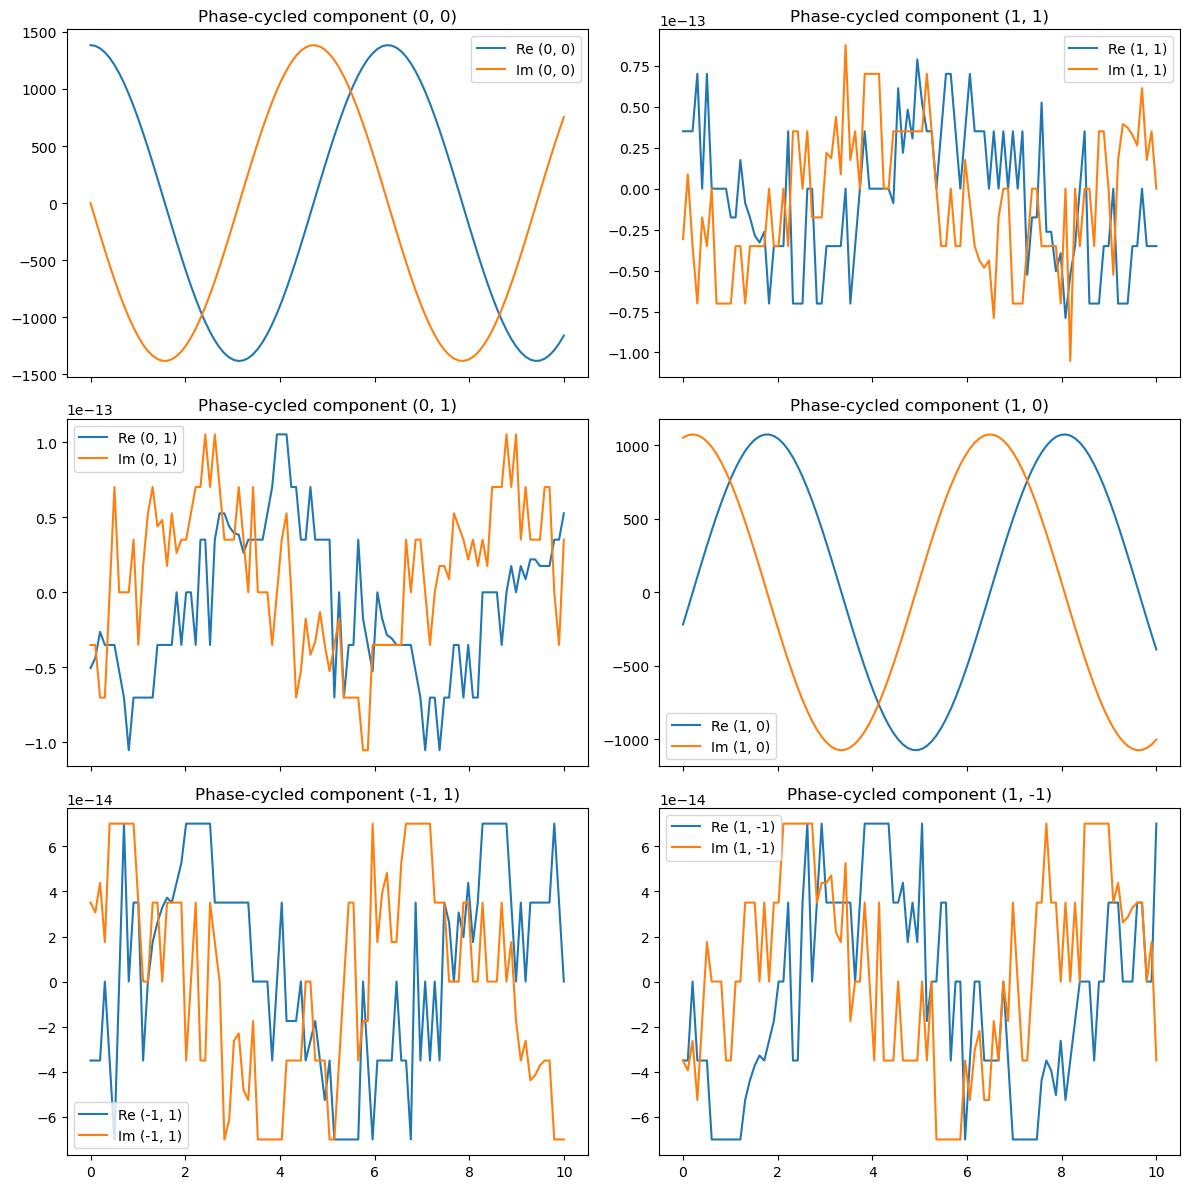

In [7]:
# Test with exp(phi1 - w t)
w = 1.0
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.exp((phi1 - 1j * w * t))

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with cos(phi1 - phi2)

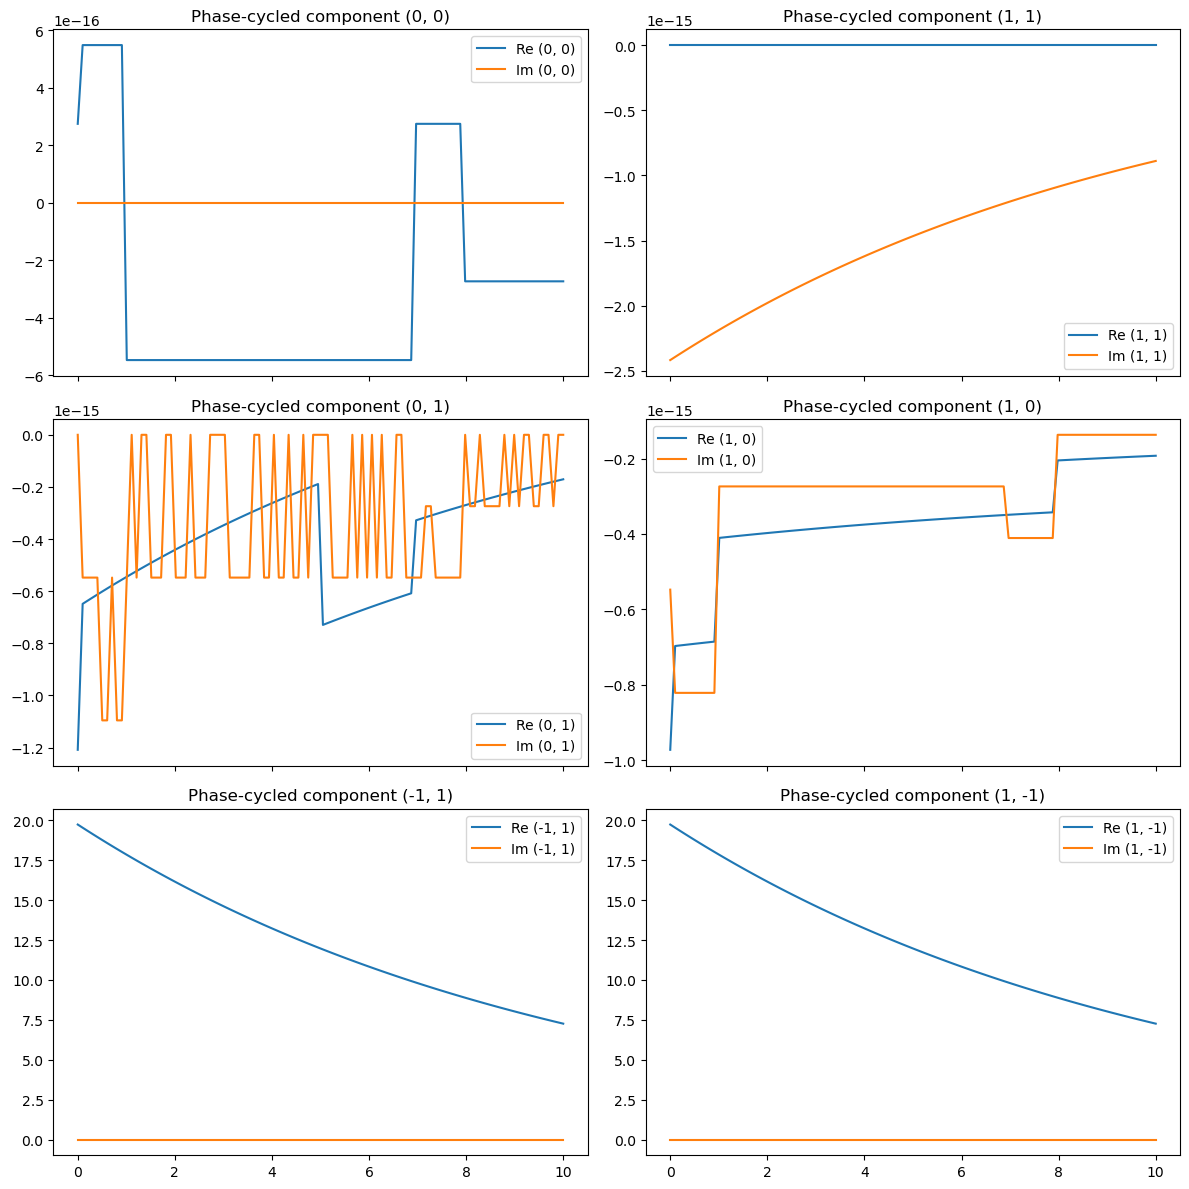

In [8]:
# Test with cos(phi1 - phi2) with exponential decay
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1  # decay rate
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.cos(np.abs(phi1 - phi2)) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

In [9]:
phases[np.newaxis, :], phases[:, np.newaxis]

(array([[0.        , 1.57079633, 3.14159265, 4.71238898]]),
 array([[0.        ],
        [1.57079633],
        [3.14159265],
        [4.71238898]]))

this should correspond to phi1 = 0, phi2 = pi/2 (6.123233995736766e-17-1j)
this should correspond to phi1 = PI/2, phi2 = 0 (6.123233995736766e-17+1j)


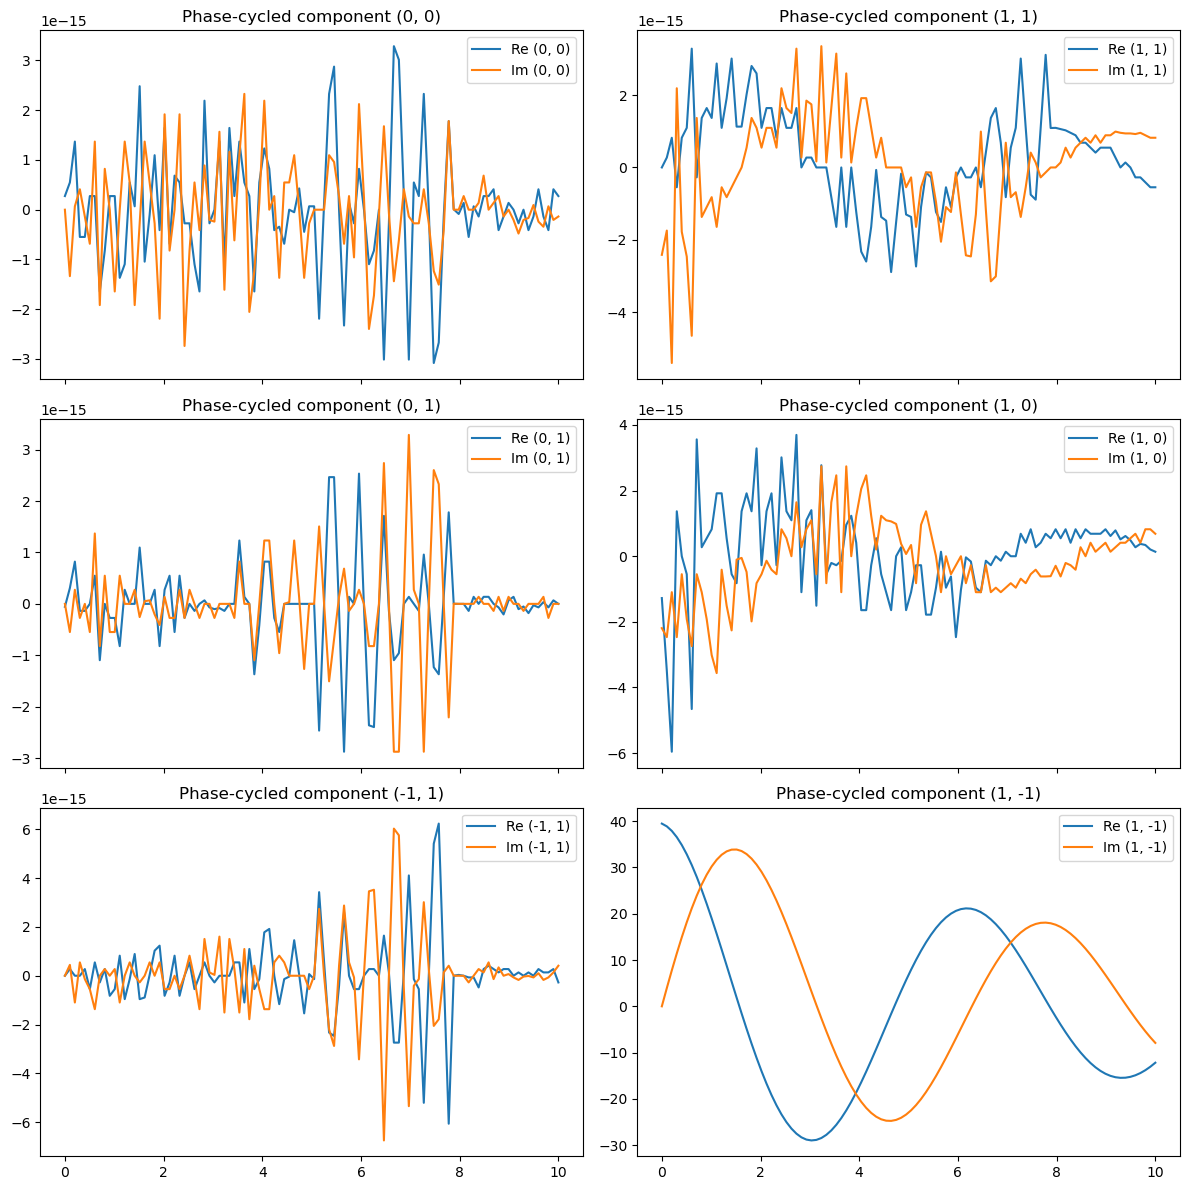

In [10]:
# Test with function depending only on t
w = 1.0
gamma = .1
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for t_idx, t in enumerate(times):
    P_grid[:, :, t_idx] = np.exp(-gamma * t) * np.exp(1j * w * t -  1j * phases[np.newaxis, :] + 1j * phases[:, np.newaxis])
    #                                                         represents a ROW (1, N) of φ2_i,        a COLUMN (N, 1) of φ1_i

print("this should correspond to phi1 = 0, phi2 = pi/2", P_grid[0, 1, 0])
print("this should correspond to phi1 = PI/2, phi2 = 0", P_grid[1, 0, 0])

lm_list = [(0,0), (1,1), (0,1), (1,0), (-1,1), (1,-1)]
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

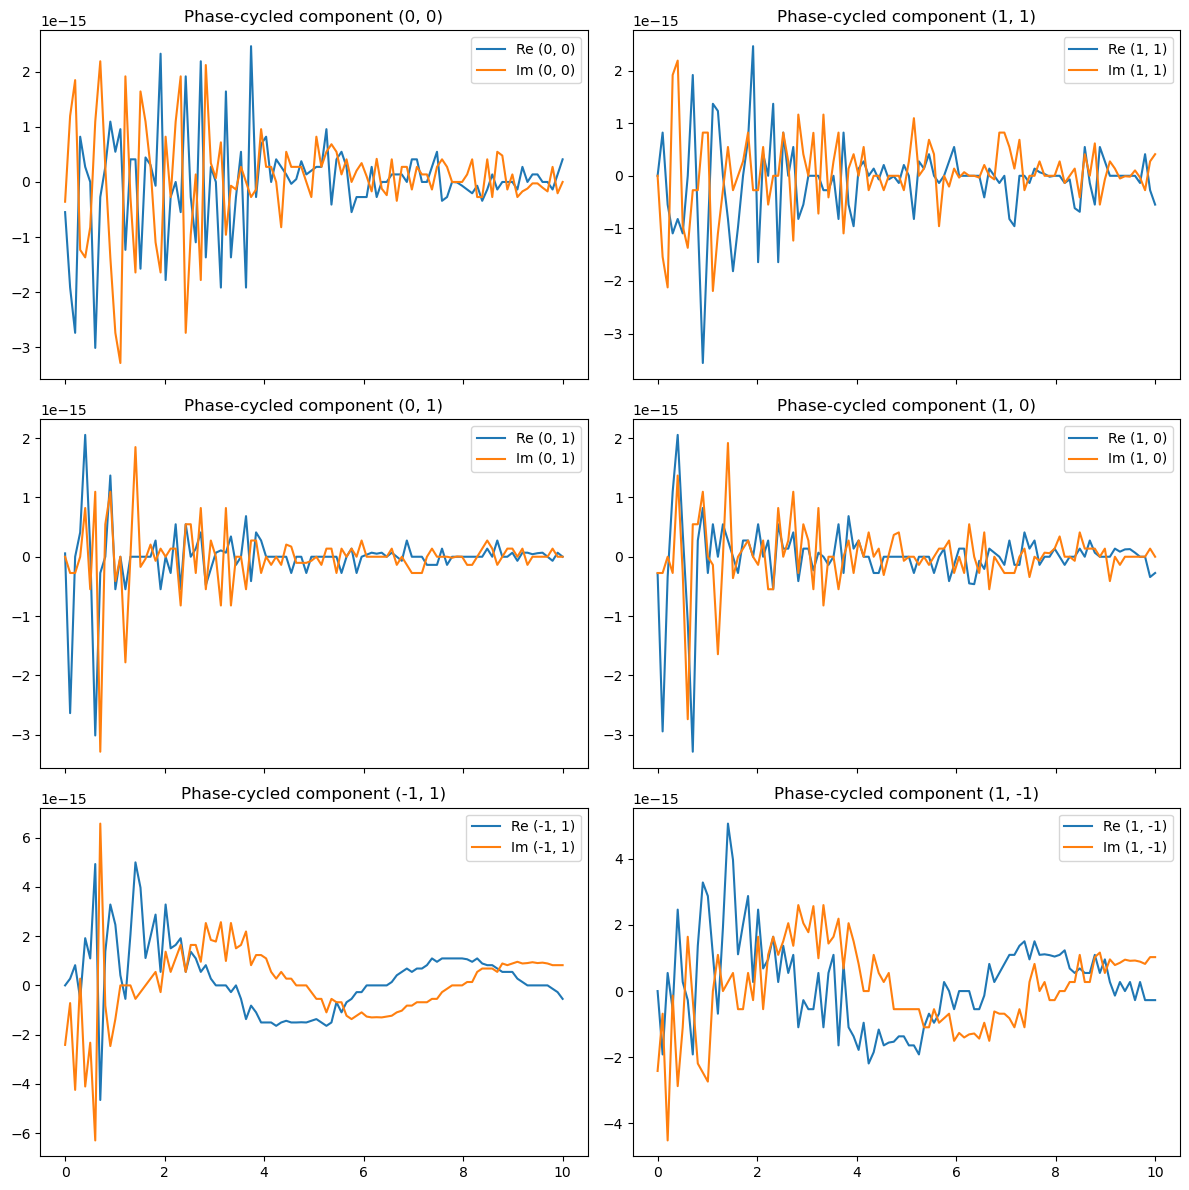

In [11]:
# Test with function depending only on t
w = 1.0
gamma = .1
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for t_idx, t in enumerate(times):
    P_grid[:, :, t_idx] = np.exp(-gamma * t) * np.exp(1j * w * t -  1j * phases[np.newaxis, :] - 1j * phases[:, np.newaxis])
    #                                                         represents a ROW (1, N) of φ2_i,        a COLUMN (N, 1) of φ1_i

lm_list = [(0,0), (1,1), (0,1), (1,0), (-1,1), (1,-1)]
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

In [12]:
# Test with function depending only on t
w = 1.0
gamma = .1
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for t_idx, t in enumerate(times):
    P_grid[:, :, t_idx] = np.exp(-gamma * t) * np.exp(1j * w * t + 1j * phases[np.newaxis, :] + 1j * phases[:, np.newaxis])
    #                                                         represents a ROW (1, N) of φ2_i,        a COLUMN (N, 1) of φ1_i

lm_list = [(0,0), (1,1), (0,1), (1,0), (-1,1), (1,-1)]
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

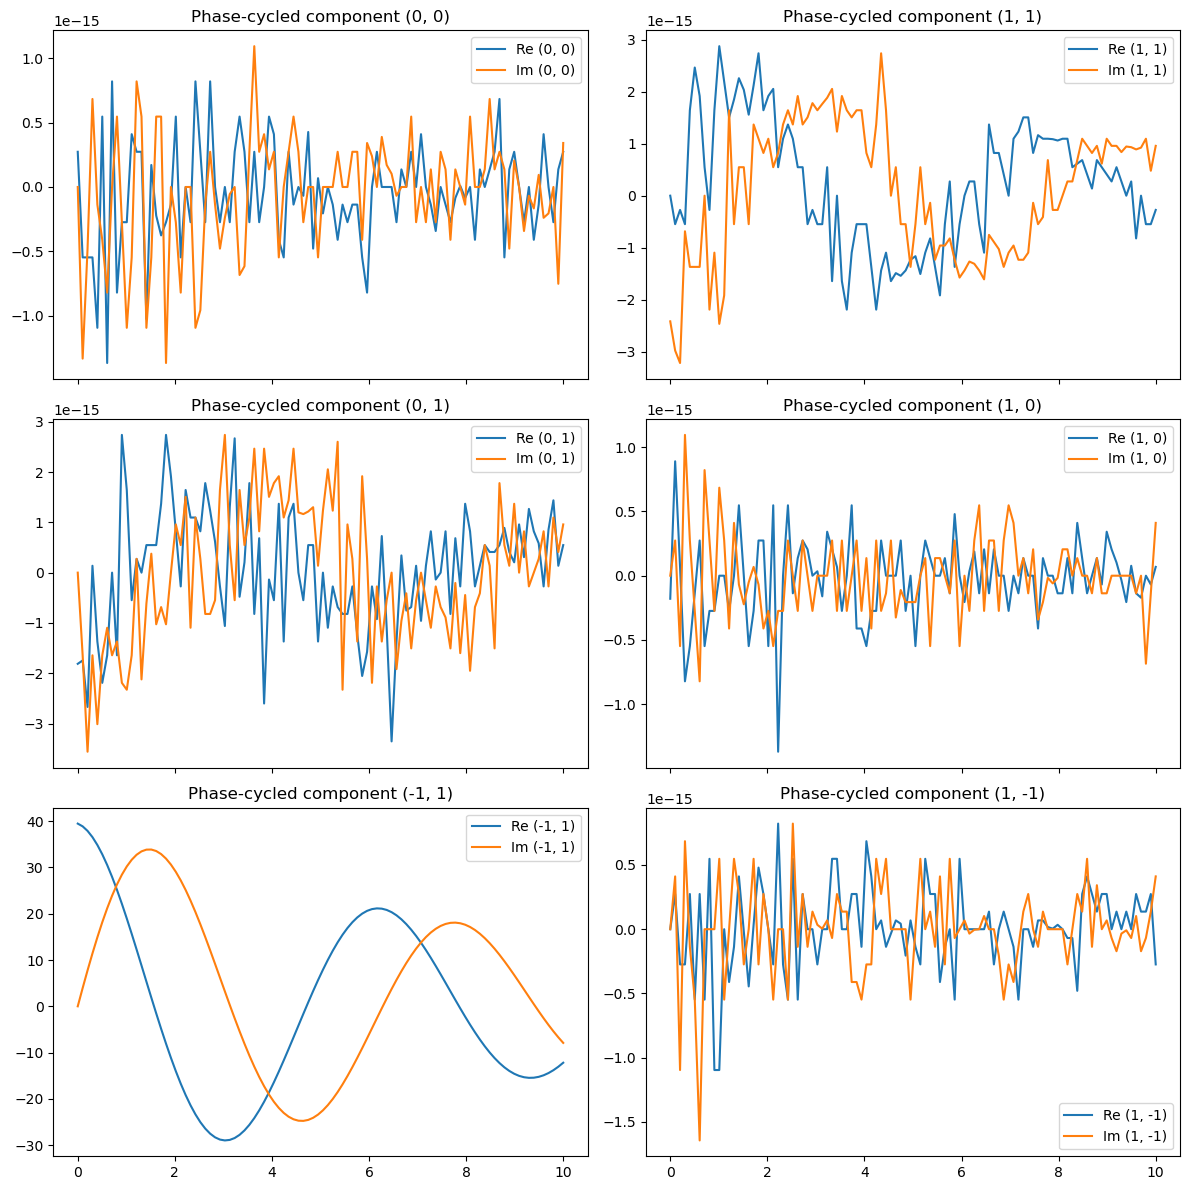

In [13]:
# Test with function depending only on t
w = 1.0
gamma = .1
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for t_idx, t in enumerate(times):
    P_grid[:, :, t_idx] = np.exp(-gamma * t) * np.exp(1j * w * t + 1j * phases[np.newaxis, :] - 1j * phases[:, np.newaxis])
    #                                                         represents a ROW (1, N) of φ2_i,        a COLUMN (N, 1) of φ1_i

lm_list = [(0,0), (1,1), (0,1), (1,0), (-1,1), (1,-1)]
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Define the function F(t, phi1, phi2) that transforms similarly under phase_cycle_component
# F is constructed as the inverse Fourier transform using the phase-cycled components
# For lm=(0,0), adjust amplitude by factor 1/2 to match the observed difference

def F(t_idx, phi1, phi2):
    """
    Reconstruct F(t, phi1, phi2) from P_grid using inverse DFT-like sum.
    t_idx: index in times array
    phi1, phi2: continuous phases
    """
    result = 0j
    dphi = np.diff(phases).mean()  # phase spacing

    for lm in lm_list:
        c_lm = phase_cycle_component(phases, P_grid, lm=lm)
        l, m = lm
        if lm == (0, 0):
            # Adjust amplitude for (0,0) by factor 2
            coeff = c_lm[t_idx] * 2
        else:
            coeff = c_lm[t_idx]
        result += coeff * np.exp(1j * (l * phi1 + m * phi2))

    # Adjust normalization: try without division
    # norm_factor = dphi ** 2 * N * N
    # return result / norm_factor
    return result

In [20]:
# Test with function F: create P_grid from F and compute phase_cycle_component
P_grid_F = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx in range(len(times)):
            P_grid_F[i, k, t_idx] = F(t_idx, phi1, phi2)

lm_list = [(0,0), (1,1), (0,1), (1,0), (-1,1), (1,-1)]
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out_F = phase_cycle_component(phases, P_grid_F, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out_F), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out_F), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm} from F')
    ax.legend()
plt.tight_layout()
plt.show()

In [21]:
# Compare original and reconstructed phase-cycled components for required lm
required_lm = [(1,-1), (-1,1), (1,1), (0,0)]
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
for idx, lm in enumerate(required_lm):
    ax = axes.flat[idx]
    # Original
    P_out_orig = phase_cycle_component(phases, P_grid, lm=lm)
    ax.plot(times, np.real(P_out_orig), label=f'Orig Re {lm}', color='blue')
    ax.plot(times, np.imag(P_out_orig), label=f'Orig Im {lm}', color='cyan')
    # From F
    P_out_F = phase_cycle_component(phases, P_grid_F, lm=lm)
    ax.plot(times, np.real(P_out_F), label=f'F Re {lm}', color='red', linestyle='--')
    ax.plot(times, np.imag(P_out_F), label=f'F Im {lm}', color='orange', linestyle='--')
    ax.set_title(f'Comparison for {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

In [4]:
import numpy as np
phis = np.array([0, np.pi/2, np.pi, 3*np.pi/2])  # 4-phase scheme
L = len(phis)
P = np.zeros((L,L), complex)

# choose a,b = (-1,+1) to mimic rephasing (kI)
a, b = -1, +1
for i,phi1 in enumerate(phis):
    for j,phi2 in enumerate(phis):
        P[i,j] = np.exp(1j*(a*phi1 + b*phi2))

# Reshape P to 3D for phase_cycle_component (add time dimension)
P_grid = P[:, :, np.newaxis]  # shape (L, L, 1)

print("kI target:", phase_cycle_component(phis, P_grid, lm=(-1, +1))[0])   # should be ≈ 1
print("kII leak :", phase_cycle_component(phis, P_grid, lm=(+1, -1))[0])   # should be ≈ 0

kI target: (39.47841760435743+0j)
kII leak : 1.216522665940099e-31j
